# ***NOTEBOOK FOR ANALYSING THE `SYNTHEA` DATA***

- GOAL IS TO FIND STRONG REASONS BEHIND PATIENTS READMISSION

# Data import and modification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os
sys.path.append(os.path.abspath(r"C:\Users\Rano's PC\Machine\github_repo_cloned\my-personal-projects\synthea readmission analysis"))

import src.plots as P
import src.stat_tests as S

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')

In [2]:
data = pd.read_csv(r"C:\Users\Rano's PC\Machine\github_repo_cloned\my-personal-projects\synthea readmission analysis\data\processed_data\processed_synthea_data.csv")

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
data.head()

,encounter_start,encounterclass,description,base_encounter_cost,payer_coverage,reasondescription,duration,total_procedures,avg_procedure_cost,total_medicines,avg_base_medicine_cost,avg_total_medicine_cost,reasons_for_medications,is_ongoing_condition,total_conditions,is_ongoing_careplan,total_careplans,age_as_2022,marital,race,ethnicity,patient_gender,provider_gender,utilization,is_readmission,condition_duration,careplan_duration
0,2010-01-23 17:45:28,AMBULATORY,Encounter for symptom,129.16,54.16,Acute bronchitis (disorder),same_day,0.0,0.00,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,38,MARRIED,WHITE,NONHISPANIC,M,F,3199,0,NaN,730 days
1,2012-01-23 17:45:28,WELLNESS,General examination of patient (procedure),129.16,129.16,unknown,same_day,0.0,0.00,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,38,MARRIED,WHITE,NONHISPANIC,M,F,33,0,NaN,NaN
2,2001-05-01 15:02:18,AMBULATORY,Encounter for symptom,129.16,0.00,Sinusitis (disorder),same_day,0.0,0.00,0.0,0.0,0.0,0.0,1.0,1.0,-1.0,0.0,32,MARRIED,WHITE,HISPANIC,M,M,2585,0,NaN,NaN
3,2011-07-28 15:02:18,WELLNESS,General examination of patient (procedure),129.16,0.00,unknown,same_day,0.0,0.00,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,32,MARRIED,WHITE,HISPANIC,M,F,58,0,NaN,NaN
4,2010-07-27 12:58:08,WELLNESS,General examination of patient (procedure),129.16,129.16,unknown,same_day,1.0,726.51,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,29,MARRIED,WHITE,NONHISPANIC,M,M,59,0,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53346 entries, 0 to 53345
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   encounter_start          53346 non-null  object 
 1   encounterclass           53346 non-null  object 
 2   description              53346 non-null  object 
 3   base_encounter_cost      53346 non-null  float64
 4   payer_coverage           53346 non-null  float64
 5   reasondescription        53346 non-null  object 
 6   duration                 53346 non-null  object 
 7   total_procedures         53346 non-null  float64
 8   avg_procedure_cost       53346 non-null  float64
 9   total_medicines          53346 non-null  float64
 10  avg_base_medicine_cost   53346 non-null  float64
 11  avg_total_medicine_cost  53346 non-null  float64
 12  reasons_for_medications  53346 non-null  float64
 13  is_ongoing_condition     53346 non-null  float64
 14  total_conditions      

In [6]:
data[['total_procedures','total_medicines','reasons_for_medications','is_ongoing_condition','total_conditions','is_ongoing_careplan','total_careplans']] =data[['total_procedures','total_medicines','reasons_for_medications','is_ongoing_condition','total_conditions','is_ongoing_careplan','total_careplans']].astype('Int64')

In [7]:
data.head(1)

,encounter_start,encounterclass,description,base_encounter_cost,payer_coverage,reasondescription,duration,total_procedures,avg_procedure_cost,total_medicines,avg_base_medicine_cost,avg_total_medicine_cost,reasons_for_medications,is_ongoing_condition,total_conditions,is_ongoing_careplan,total_careplans,age_as_2022,marital,race,ethnicity,patient_gender,provider_gender,utilization,is_readmission,condition_duration,careplan_duration
0,2010-01-23 17:45:28,AMBULATORY,Encounter for symptom,129.16,54.16,Acute bronchitis (disorder),same_day,0,0.0,0,0.0,0.0,0,-1,0,0,1,38,MARRIED,WHITE,NONHISPANIC,M,F,3199,0,NaN,730 days


In [8]:
data['condition_duration']= data['condition_duration'].str.replace(' days',"").astype('Int64')

In [9]:
data['careplan_duration']= data['careplan_duration'].str.replace(' days',"").astype('Int64')

In [10]:
data.shape

(53346, 27)

# Univariate Analysis of data

In [11]:
data.describe().round(2)

,base_encounter_cost,payer_coverage,total_procedures,avg_procedure_cost,total_medicines,avg_base_medicine_cost,avg_total_medicine_cost,reasons_for_medications,is_ongoing_condition,total_conditions,is_ongoing_careplan,total_careplans,age_as_2022,utilization,is_readmission,condition_duration,careplan_duration
count,53346.00,53346.00,53346.0,53346.00,53346.0,53346.00,53346.00,53346.0,53346.0,53346.0,53346.0,53346.0,53346.00,53346.00,53346.00,4462.0,1951.0
mean,128.75,62.00,0.66,2129.45,0.8,162.61,1431.68,0.5,-0.8,0.16,-0.91,0.07,55.66,1329.70,0.39,89.17,193.42
std,4.58,43.61,1.7,5596.18,1.2,406.75,9931.92,0.61,0.53,0.41,0.38,0.25,25.87,1427.73,0.49,533.85,584.35
min,77.49,0.00,0.0,0.00,0.0,0.00,0.00,0.0,-1.0,0.0,-1.0,0.0,0.00,1.00,0.00,0.0,1.0
25%,129.16,17.49,0.0,0.00,0.0,0.00,0.00,0.0,-1.0,0.0,-1.0,0.0,35.00,86.00,0.00,10.0,21.0
50%,129.16,69.16,0.0,0.00,1.0,6.80,7.22,0.0,-1.0,0.0,-1.0,0.0,58.00,821.00,0.00,14.0,60.0
75%,129.16,89.16,1.0,602.04,1.0,263.49,1783.74,1.0,-1.0,0.0,-1.0,0.0,73.00,2159.00,1.00,30.0,217.0
max,129.16,129.16,21.0,187968.69,10.0,6901.17,1296594.95,4.0,1.0,7.0,1.0,2.0,112.00,4828.00,1.00,17946.0,10203.0


### ***Statistical insights from numerical columns***

- max value of `procedure_cost` is very high

- max value of `average_total_medicine_cost` is too high

- `utilization` column is spreaded from 1 to 4828

- `age` column have values from 0 to 112 as of 2022

- max value in `condition_duration` is too high

- max value for `careplan_duration` is also very high

In [12]:
data.describe(include='object')

,encounter_start,encounterclass,description,reasondescription,duration,marital,race,ethnicity,patient_gender,provider_gender
count,53346,53346,53346,53346,53346,53346,53346,53346,53346,53346
unique,50029,6,50,81,4,3,5,2,2,2
top,1973-07-27 23:35:03,WELLNESS,General examination of patient (procedure),unknown,same_day,MARRIED,WHITE,NONHISPANIC,F,F
freq,7,19106,14946,39569,51759,30413,41794,49267,26891,31135


### ***Statistical insights from categorical columns***

- max `encounter` in single day is 7

- `encounter_class` have 6 uniqe values, wellness being most frequent

- `description` column have 50 unique values, general examination being most frequent

- `reasondescription` columns have 81 unique values, most of them being unknown

- `duration` column have 4 unique values, same_day being the most frequent

In [13]:
data.select_dtypes(include='number').nunique().reset_index(name = 'total_unique_values')

,index,total_unique_values
0,base_encounter_cost,2
1,payer_coverage,15
2,total_procedures,10
3,avg_procedure_cost,15909
4,total_medicines,11
5,avg_base_medicine_cost,11010
6,avg_total_medicine_cost,11986
7,reasons_for_medications,5
8,is_ongoing_condition,3
9,total_conditions,7


In [14]:
data.select_dtypes(include='object').nunique().reset_index(name = 'total_unique_values')

,index,total_unique_values
0,encounter_start,50029
1,encounterclass,6
2,description,50
3,reasondescription,81
4,duration,4
5,marital,3
6,race,5
7,ethnicity,2
8,patient_gender,2
9,provider_gender,2


In [15]:
small_cat_cols = ['encounterclass', 'duration', 'marital','race', 'ethnicity', 'patient_gender', 
                  'provider_gender','base_encounter_cost','reasons_for_medications','is_ongoing_condition','is_ongoing_careplan','total_careplans']

In [16]:
large_num_cols = ['avg_procedure_cost','avg_base_medicine_cost','avg_total_medicine_cost','age_as_2022', 'utilization','condition_duration', 'careplan_duration']

In [17]:
large_cat_cols = ['payer_coverage', 'total_procedures','total_medicines','total_conditions','description','reasondescription']

In [18]:
target_col = ['is_readmission']

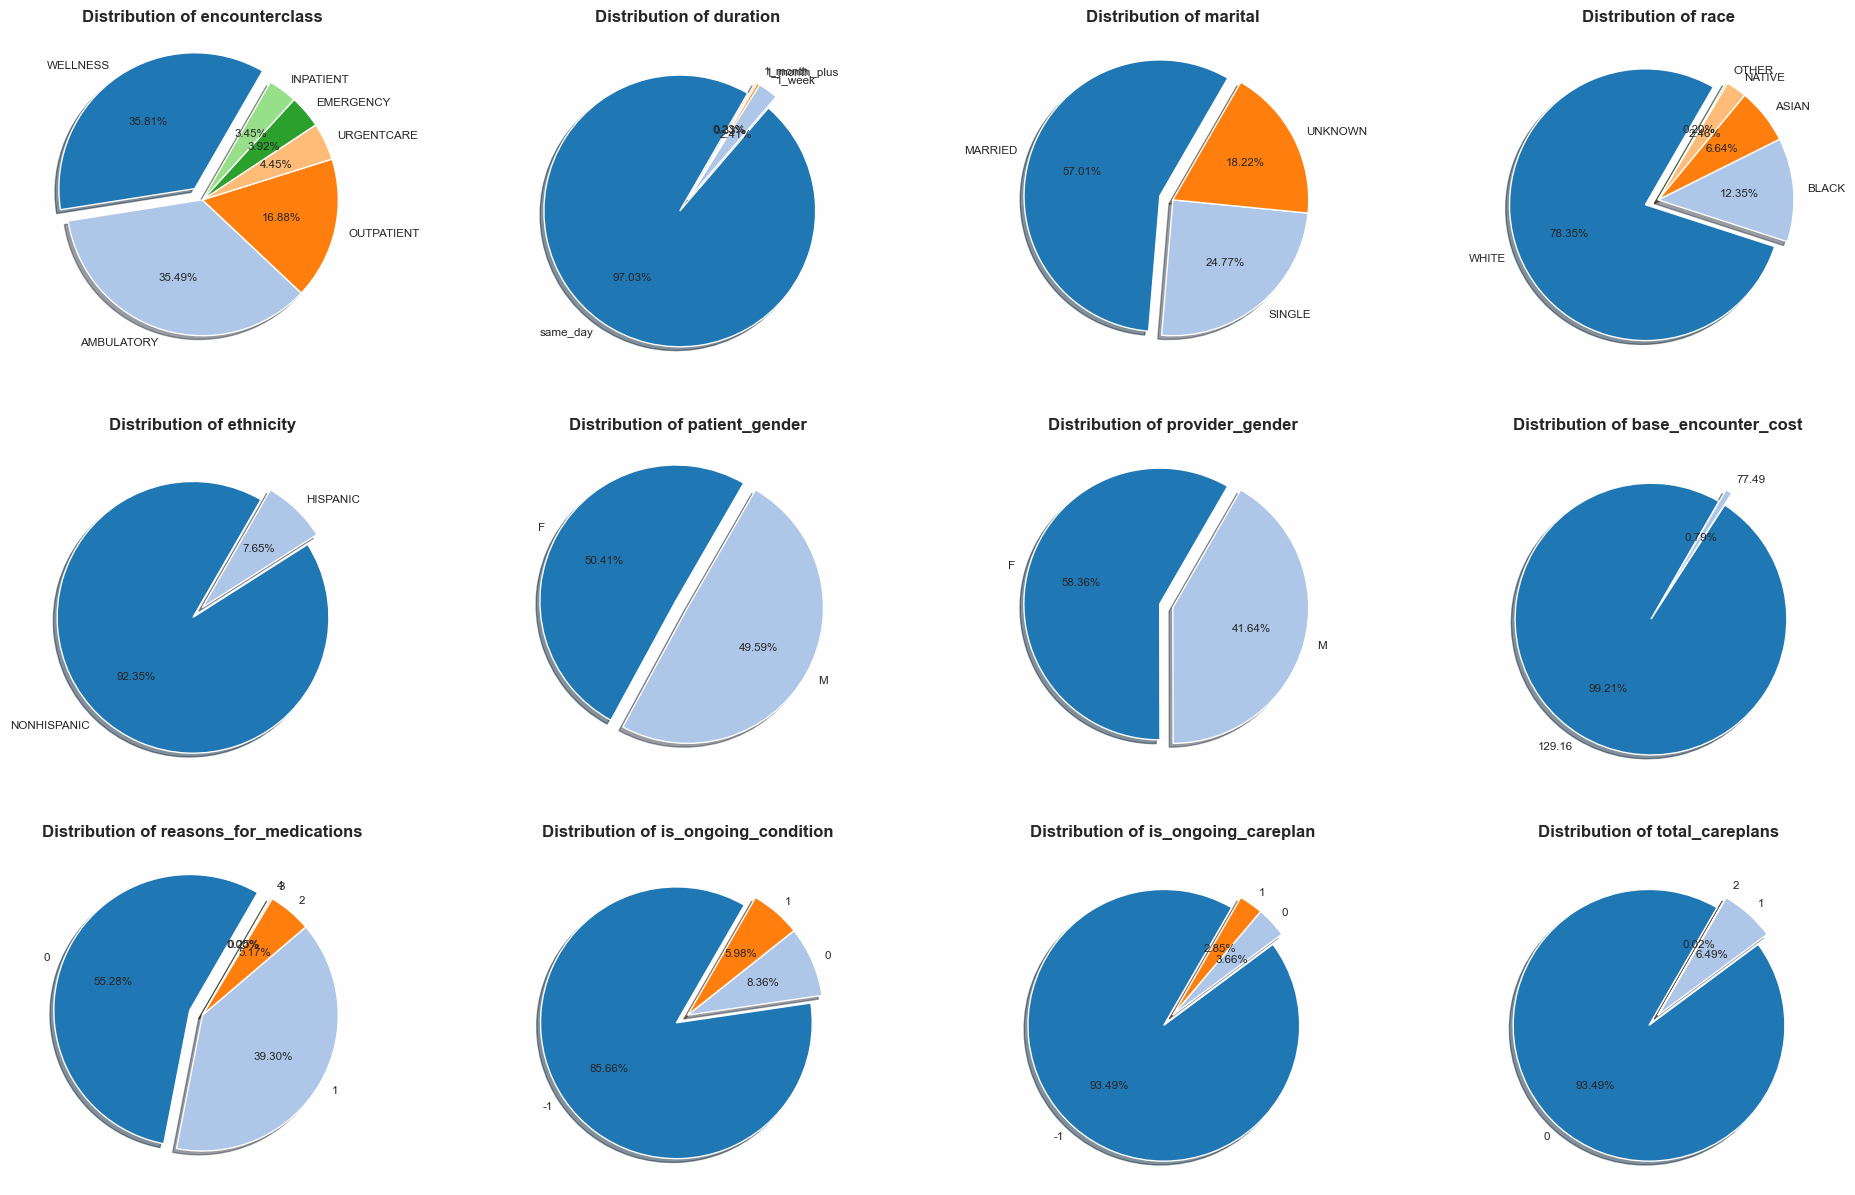

In [19]:
fig = plt.figure(figsize=(24,15))
limit = len(small_cat_cols)
for i,column in enumerate(small_cat_cols):
    if i> limit:
        break
    plt.subplot(3,4,i+1)
    P.plot_pie(column=column,data=data)

### ***Insights from univariate analysis of small classed categorical columns***

- `wellness` and `ambulatory` is most frequent in `enounterclass` column

- more than 97% `duration` belongs to `same_day` class

- `marital` column have more than 57% of values as `married`

- more than 75% of observations in `race` column is `white`

- approx 93% of observations in `ethnicity` column is hispanic

- `patient_gender` is equally distributed among male and females

- few more `female` observations in `provider_gender` column

- `base_encounter_cost` is 129.16 for more than 99% observations

- `reason_for_medicine` column have 0 as most frequent value, more than 55%

- only approx 6% of observations are ongoing according to `is_ongoing_condition` column

- only approx 3% of observations are ongoing according to `is_ongoing_careplan` column

- `total_careplans` column have 0 as most frequent value

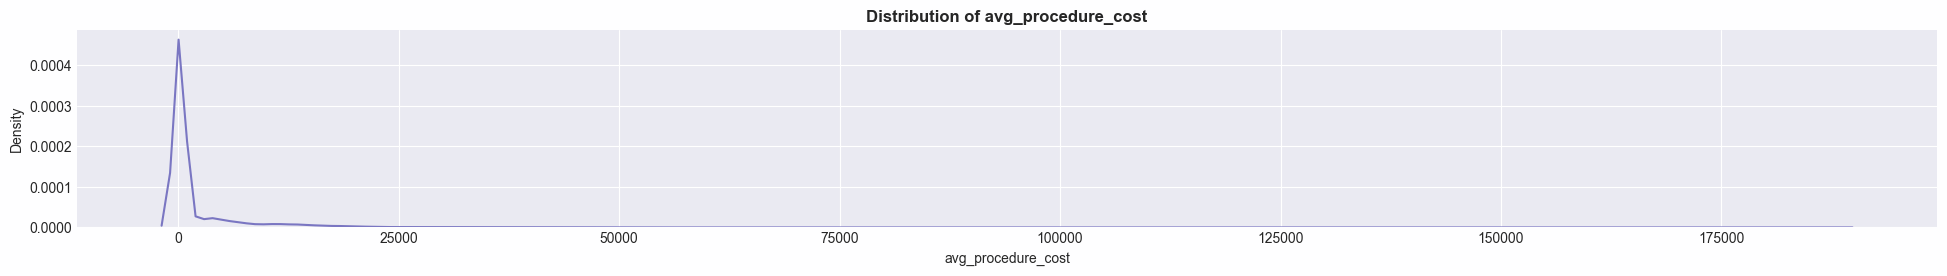

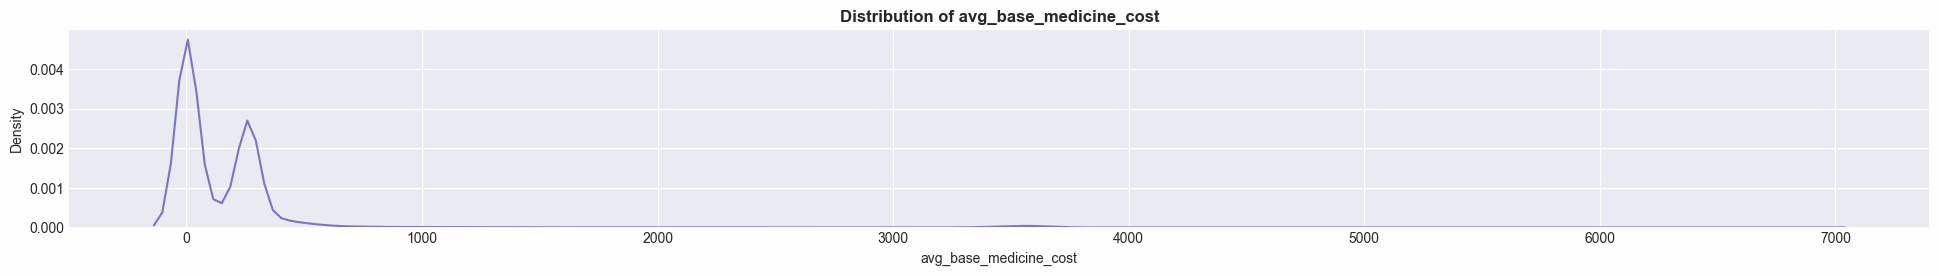

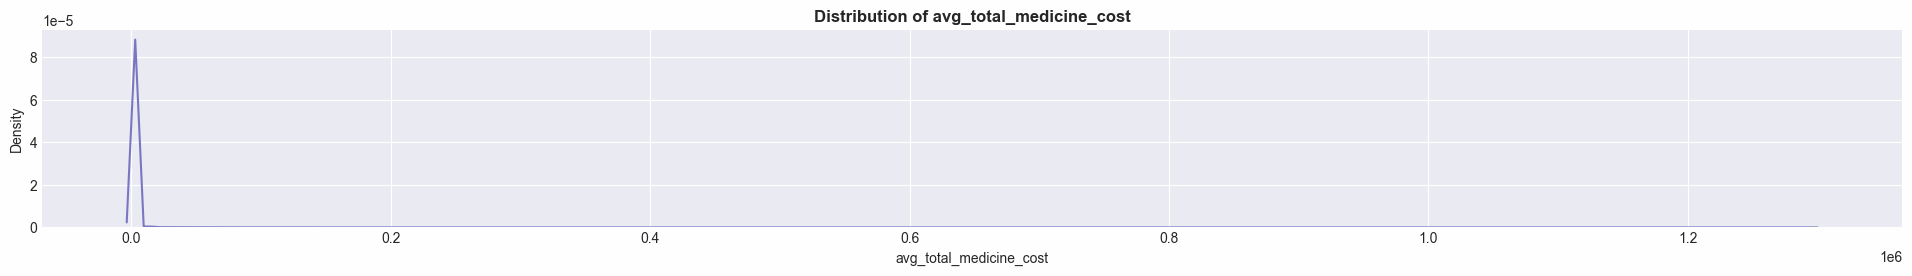

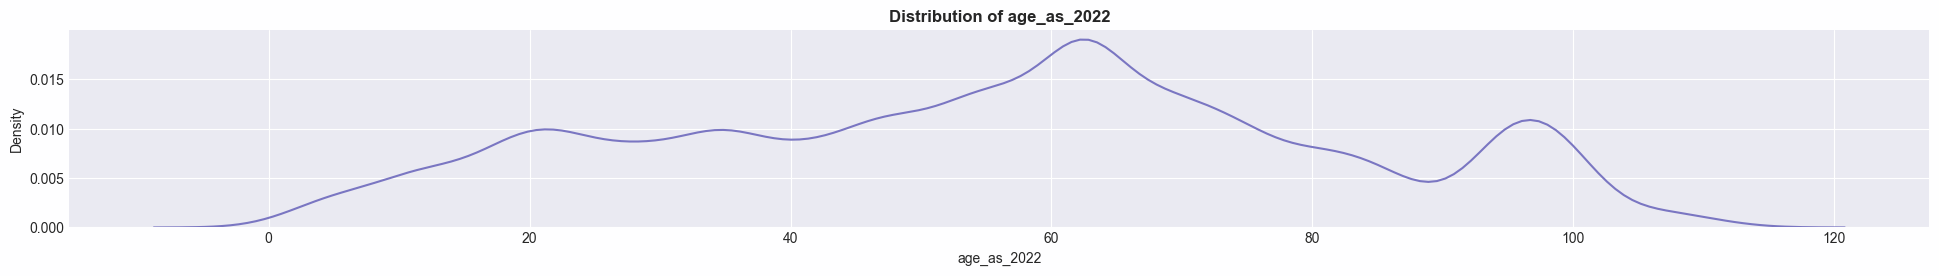

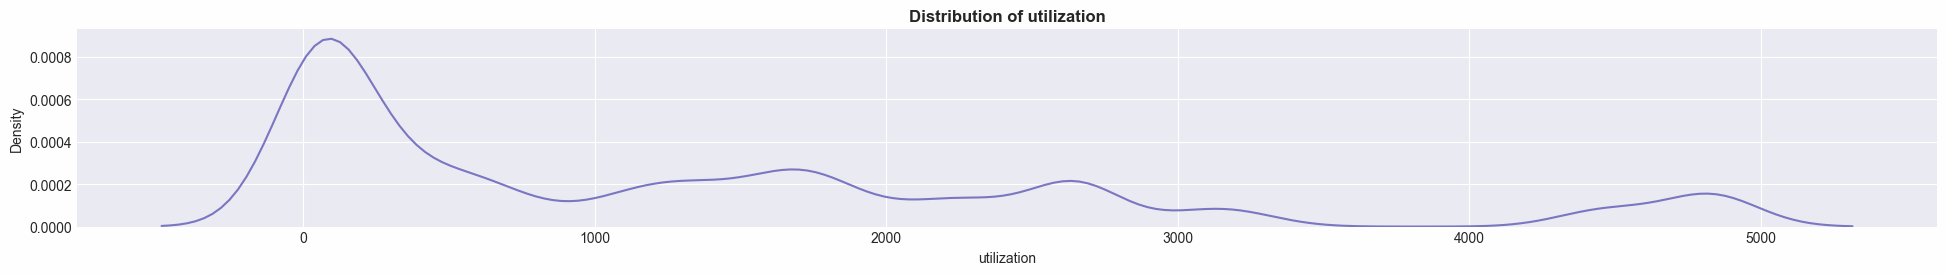

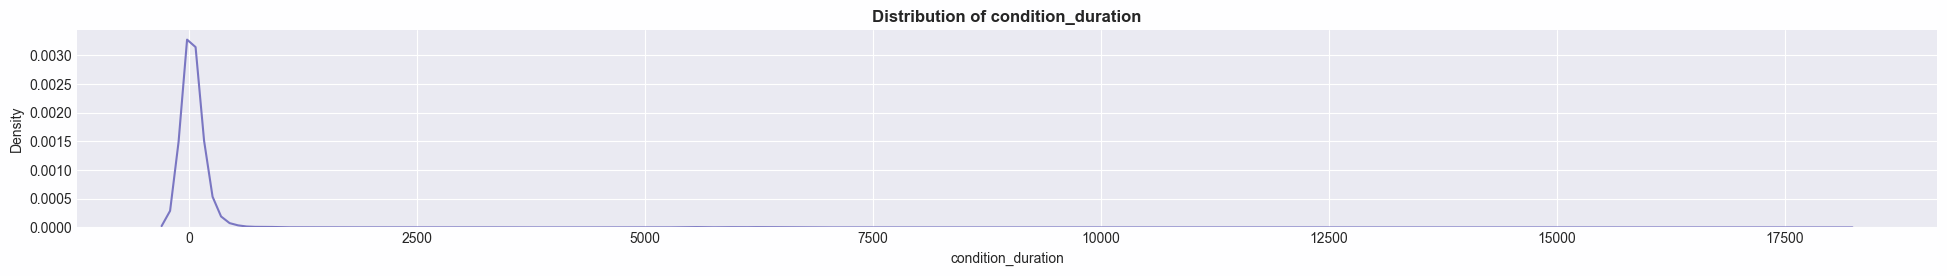

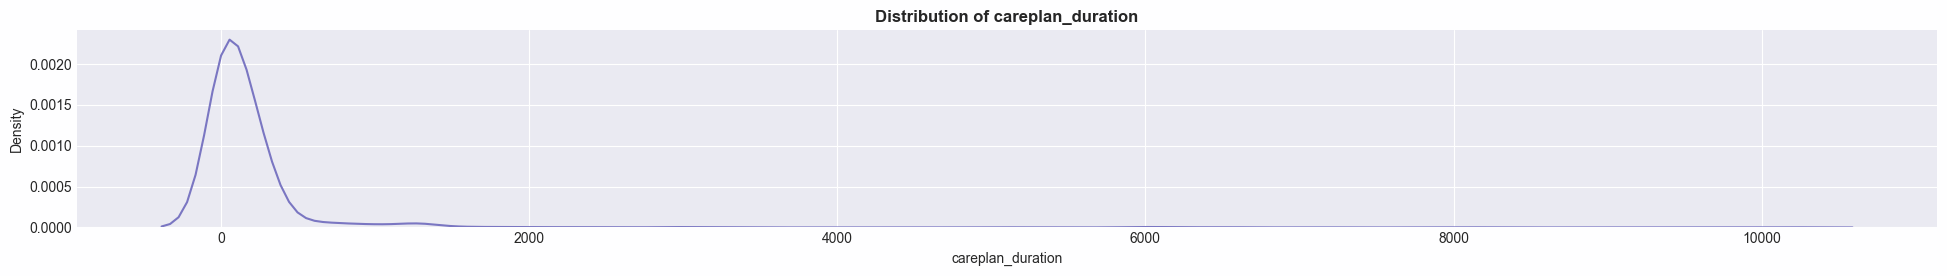

In [20]:
limit = len(large_num_cols)
for i,column in enumerate(large_num_cols):
    if i> limit:
        break
    fig = plt.figure(figsize=(24,21))
    plt.subplot(7,1,i+1)
    P.plot_kde(column=column,data=data)
    plt.show()

### ***Insights from univariate analysis of numerical columns***

- `avg_procedure_cost`, `avg_medicine_cost`,`total_medicine_cost`,`utilization`,`condition_duration`, `careplan_duration` - these columns are skewed towards right, with very few values at the higher end

- `age` column is spreaded nicely with a small peak near 100

In [26]:
for cols in large_cat_cols:
    df = data[cols].value_counts(normalize=True).mul(100).round(2).reset_index(name = r"% of observations").sort_values(by ="% of observations", ascending = False ).head(10)
    display(df)
    display("_"*50)

,payer_coverage,% of observations
0,0.00,24.53
1,129.16,18.03
2,69.16,16.72
3,89.16,13.37
4,54.16,9.11
5,59.16,6.00
6,49.16,4.84
7,64.16,4.07
8,74.16,1.92
9,29.16,0.94


'__________________________________________________'

,total_procedures,% of observations
0,0,60.5
1,1,29.59
2,2,5.62
3,3,2.35
4,4,0.78
5,20,0.57
6,5,0.49
7,7,0.08
8,6,0.0
9,21,0.0


'__________________________________________________'

,total_medicines,% of observations
0,0,48.88
1,1,35.73
2,2,10.24
3,3,2.05
4,4,1.15
5,5,0.83
6,6,0.36
7,9,0.29
8,10,0.25
9,8,0.11


'__________________________________________________'

,total_conditions,% of observations
0,0,85.66
1,1,13.25
2,2,0.88
3,3,0.18
4,4,0.03
5,5,0.01
6,7,0.0


'__________________________________________________'

,description,% of observations
0,General examination of patient (procedure),28.02
1,Encounter for problem (procedure),9.74
2,Encounter for check up (procedure),8.46
3,Well child visit (procedure),7.77
4,Encounter for symptom,7.37
5,Prenatal visit,5.02
6,Urgent care clinic (procedure),4.45
7,Encounter for problem,4.29
8,Follow-up encounter,4.28
9,Patient encounter procedure,3.04


'__________________________________________________'

,reasondescription,% of observations
0,unknown,74.17
1,Normal pregnancy,7.08
2,Hyperlipidemia,4.26
3,Viral sinusitis (disorder),2.58
4,Acute viral pharyngitis (disorder),1.30
5,Acute bronchitis (disorder),1.29
6,Chronic congestive heart failure (disorder),1.16
7,Malignant neoplasm of breast (disorder),1.10
8,Child attention deficit disorder,0.54
9,Sinusitis (disorder),0.50


'__________________________________________________'

### ***Insights from univariate analysis of large categorical columns***

- `payer_coverage`,`total_procedures`, `total_medicines`,`total_conditions` all these columns have 0 as most frequent values

- `description` column have general examination as most frequent value as 28% of observations

- `reason_description` column have nearly 75% of value are unknown

***

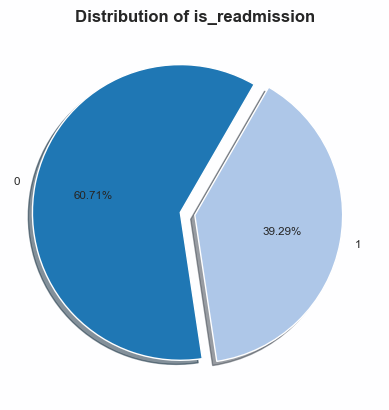

In [27]:
P.plot_pie('is_readmission',data=data)

### Insight from univariate analysis of target column

- nearly 40% of observations are from `is_readmission = 1` class

***

# Bivariate Analysis with `is_readmision` column

***

In [37]:
small_cat_cols

['encounterclass',
 'duration',
 'marital',
 'race',
 'ethnicity',
 'patient_gender',
 'provider_gender',
 'base_encounter_cost',
 'reasons_for_medications',
 'is_ongoing_condition',
 'is_ongoing_careplan',
 'total_careplans']

**encounterclass**

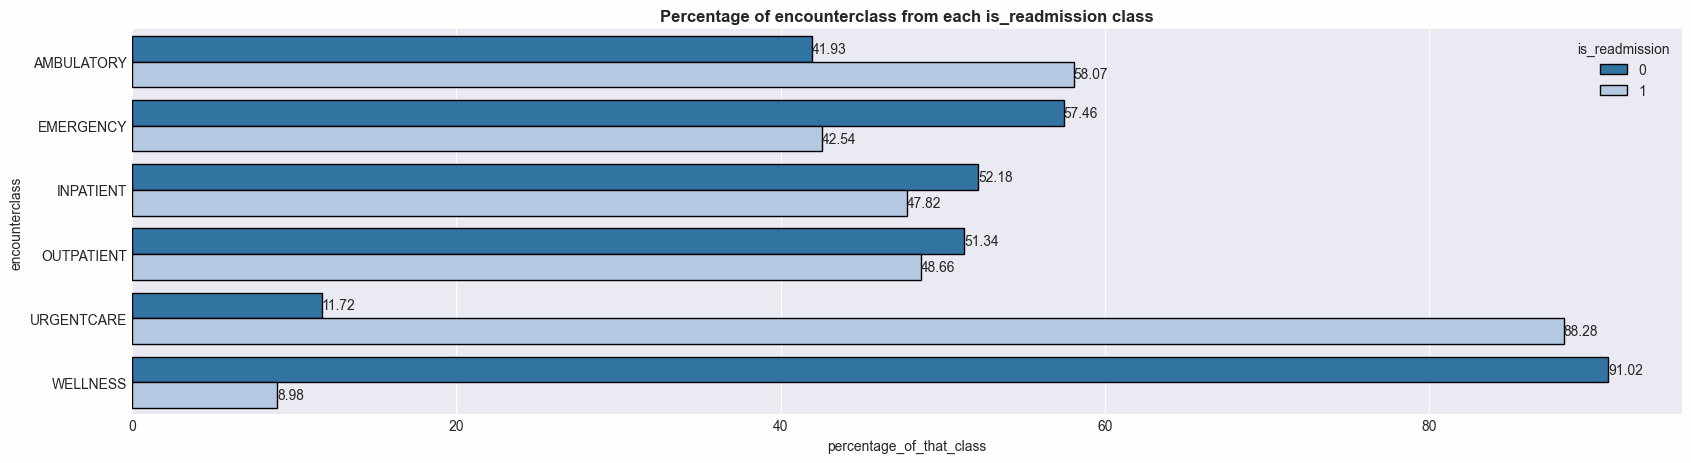

In [29]:
plt.figure(figsize=(20,5))
P.percentage_in_that_class(column='encounterclass',data=data,target='is_readmission',orient='h')

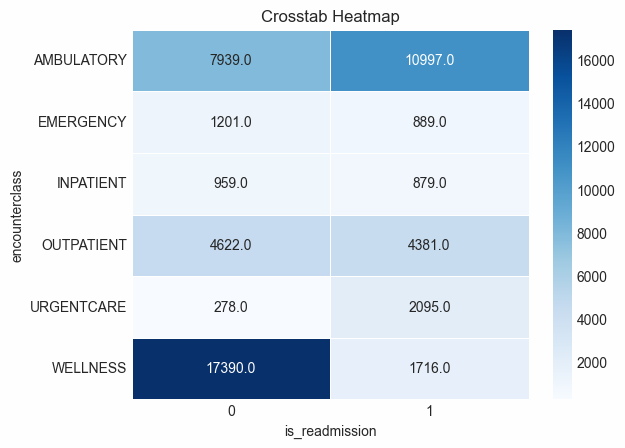

In [30]:
ct = pd.crosstab(data['encounterclass'],data['is_readmission'])

P.plot_heatmap(ct)

`urgentcare` and `ambulatory` class is showing high percentage of readmission...I need to do statistical test to check if they are actually different, and have association

In [35]:
urgent_care_mask = (data['encounterclass']=='URGENTCARE') | (data['encounterclass']=='AMBULATORY')
ct = pd.crosstab(urgent_care_mask,data['is_readmission'])

S.chi_sqared_test(ct)

Chi-square p-value: 0.00000
Cramer's V: 0.370 → Strong


{'statistic': np.float64(7299.514640473018),
 'p': np.float64(0.0),
 'dof': 1,
 'cramers_v': np.float64(0.3699099911816316),
 'strength': 'Strong',
 'expected': array([[19451.25019683, 12585.74980317],
        [12937.74980317,  8371.25019683]])}

***

**duration**

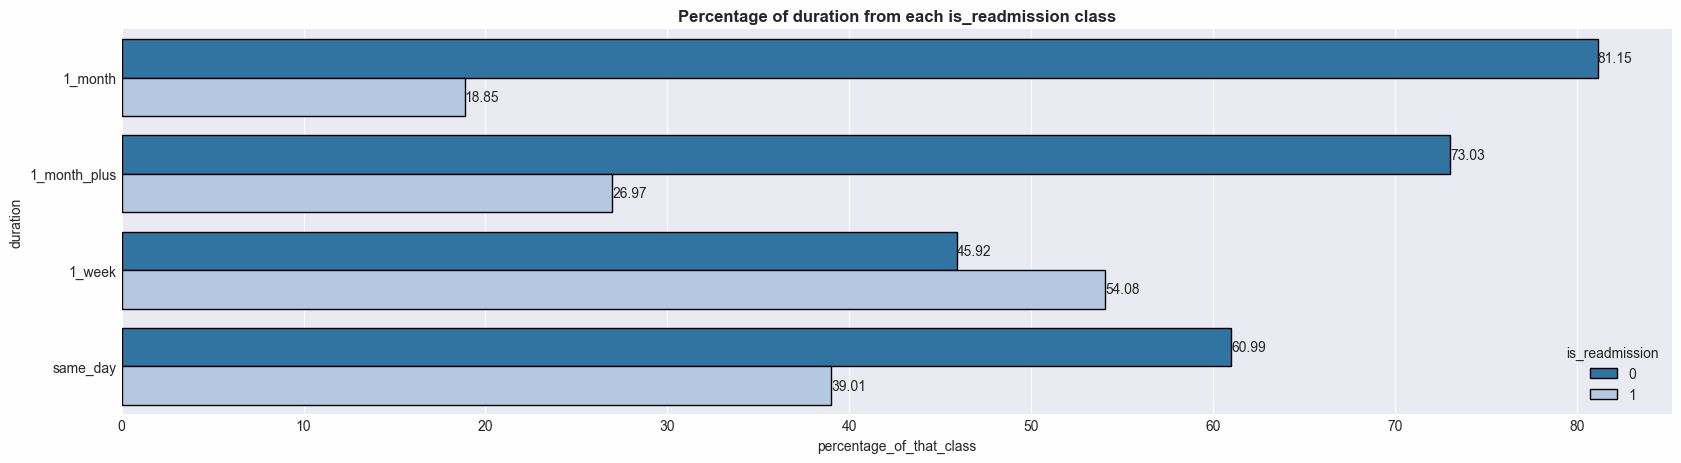

In [38]:
plt.figure(figsize=(20,5))
P.percentage_in_that_class(column='duration',data=data,target='is_readmission',orient='h')

1 week is showing a little high percentage of readmission

In [39]:
duration_mask = (data['duration']=='1_week')
ct = pd.crosstab(duration_mask,data['is_readmission'])

S.chi_sqared_test(ct)

Chi-square p-value: 0.00000
Cramer's V: 0.048 → Weak


{'statistic': np.float64(120.38190989306393),
 'p': np.float64(5.2182422176214625e-28),
 'dof': 1,
 'cramers_v': np.float64(0.047503945752855124),
 'strength': 'Weak',
 'expected': array([[31607.5985266, 20451.4014734],
        [  781.4014734,   505.5985266]])}

nothing specific with duration

***

**marital**

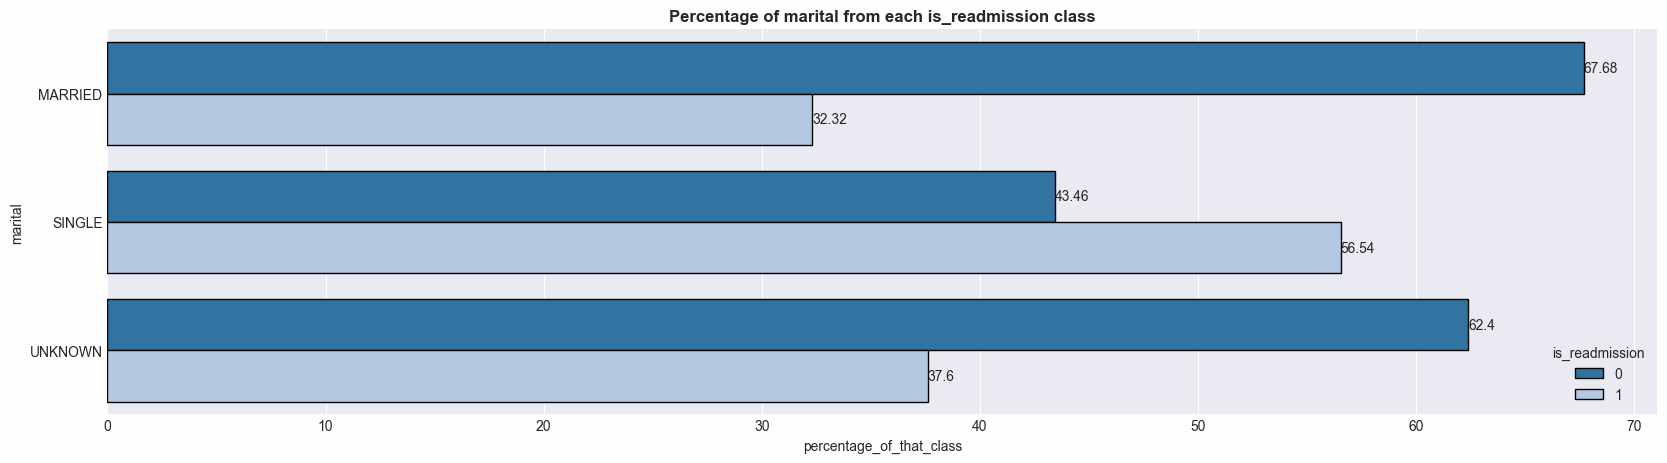

In [40]:
plt.figure(figsize=(20,5))
P.percentage_in_that_class(column='marital',data=data,target='is_readmission',orient='h')

marital class single is showing a little high percentage of readmission

In [41]:
marital_mask = (data['marital']=='SINGLE')
ct = pd.crosstab(marital_mask,data['is_readmission'])

S.chi_sqared_test(ct)

Chi-square p-value: 0.00000
Cramer's V: 0.203 → Moderate


{'statistic': np.float64(2192.2716160082273),
 'p': np.float64(0.0),
 'dof': 1,
 'cramers_v': np.float64(0.20271983785176978),
 'strength': 'Moderate',
 'expected': array([[24365.51867057, 15765.48132943],
        [ 8023.48132943,  5191.51867057]])}

marital class single is showing moderate effect on readmission

***

### Findings from bivariate analysis with is_readmisson column

- ***`urgentcare` and `ambulatory` class showed a high percentage of readmission, after doing statistical test, we can validate that patients of these classes are more likely to readmit more***

- ***`single` marital class showed a high percentage of readmission, after doing statistical test wen can validate that marital class single have a moderate impact on readmission,with single marital being more readmission***